## **栗まんじゅう問題**  
漫画ドラえもんには「バイバイン」という道具が登場する、2のn乗に関する有名なエピソード[1]があります。


[1] 藤子・Ｆ・不二雄(1979)『ドラえもん（１７）』小学館.


「バイバイン」は薬品で、これを振掛けるとその物体は5分ごとに倍に増えるという働きがあります。作中では栗まんじゅうを増やしますが、食べきれなくなったためロケットを使い宇宙に捨てました。


ここで度々話題になるのが、栗まんじゅうはその後宇宙でどのように増えていくのかについてです。様々な議論がされていますが、今回は単純に栗まんじゅうの体積がどう増えるかを計算してみましょう。

**【問題】栗まんじゅうが太陽系を覆う日**  
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。


栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。


ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

●関数の作成

In [1]:
import math

def sphere_volume(r):
    """
    球体の半径を与えると、体積を返す関数
    
    Parameter
    ---------
    r: 半径
    
    Return
    --------
    volume: 体積
    """
    volume = (4/3)*math.pi*r**3
    
    return volume

●栗まんじゅうの体積   
$$60mm × 40mm × 30mm = 72000[mm^3]$$  
[km]換算すると、$$7.2×10^{-14}[km^3]$$
>参考http://www.suya-honke.co.jp/products/detail.php?product_id=31

In [2]:
KURI = 7.2*10**-14

●太陽系の体積  
半径1光年の球体の大きさとする。1光年＝約9兆5000億km  
>参考http://earth38moon.blog115.fc2.com/blog-entry-27.html

In [3]:
TAIYOUKEI = sphere_volume(9.5*10**12)
print("太陽系の体積は、{}[k㎥]".format(TAIYOUKEI))

太陽系の体積は、3.5913640018287316e+39[k㎥]


●関数の作成

In [4]:
def calculate_time(unit_time, volume, target_volume):
    """
    「（A）が倍になる単位時間」「任意の体積（A）」「対象となる任意の体積（B）」を与えると、
    単位時間辺りに倍に増える（A）が、（B）の体積を超えるのに必要な時間を返す関数
    
    Parameter
    --------
    unit_time：倍になる単位時間
    volume：任意の体積（A）
    target_volume：対象となる任意の体積（B）
    
    Return
    -------
    necessary_time：必要な時間
    """
    num = 0 #繰り返し回数
    change_volume = volume
    
    while change_volume <= target_volume:
        change_volume *= 2
        if change_volume > target_volume:
            break
        num += 1
    
    necessary_time = num*unit_time
    
    return necessary_time

●栗まんじゅうが太陽系を覆うのにかかる時間

In [5]:
necessary_time = calculate_time(5, KURI, TAIYOUKEI)
print("{}分".format(necessary_time))
print("時間換算で{}時間{}分".format(necessary_time//60, necessary_time%60))

875分
時間換算で14時間35分


関数を作成したので、栗まんじゅうが太陽系を覆う時間に限らず、あらゆる場合に対応できる。

●グラフの作成  
栗まんじゅうの単位時間辺りの体積の増え方をグラフ化

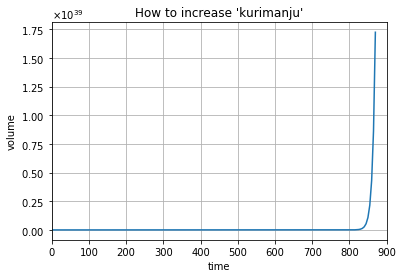

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

unit_time = 5 #単位時間

x = np.arange(0, 875, unit_time) #0〜875を5で分割
y = KURI*2**(x/unit_time) #栗の体積の増え方の式

#figureの設定
fig = plt.figure()

#axesの作成
ax = fig.add_subplot(1, 1, 1, \
                    title="How to increase 'kurimanju'", \
                    xlabel="time", \
                    ylabel="volume", \
                    xlim=(0,900)) #横軸の範囲
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #指数表記の変更
ax.grid()
ax.plot(x, y) #折れ線グラフのプロット
plt.show() #プロットの表示